<a href="https://colab.research.google.com/github/ShreyasP20/Machine_Learning/blob/main/DecisionTree_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/My Drive/Colab Notebooks/amazon.csv')

In [ ]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['product_id'] = le.fit_transform(df['product_id'])
df['category'] = le.fit_transform(df['category'])
df['product_name'] = le.fit_transform(df['product_name'])
df['rating'] = le.fit_transform(df['rating'])
df['rating_count'] = le.fit_transform(df['rating_count'])
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,346,1158,10,₹399,"₹1,099",64%,19,502,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,848,134,10,₹199,₹349,43%,17,791,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,819,1023,10,₹199,"₹1,899",90%,15,1010,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,643,1264,10,₹329,₹699,53%,19,1129,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,588,829,10,₹154,₹399,61%,19,314,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,673,696,192,₹379,₹919,59%,16,25,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,201,850,172,"₹2,280","₹3,045",25%,18,719,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...
1462,27,164,138,"₹2,219","₹3,080",28%,12,812,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...
1463,61,462,129,"₹1,399","₹1,890",26%,16,1041,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","Shubham Dubey,E.G

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(df.iloc[:,1:-1], df.iloc[:,-1], test_size=0.3, random_state=4)
print(len(X_train))
print(len(X_test))
X_train

1025
440


,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link
1402,859,174,"₹1,199","₹1,795",33%,19,861,Content: Prestige sandwich toaster with fixed ...,"AG7XS62BBYTJDLOVUFYPSQ2DZZZA,AHIQFVEC26UUHE433...","Jasmin Azzuhoor,Shreya,Avninder Singh,Namita S...","R2I9AG0WA9VOAX,R2AZI4X0RQO5R5,R2UI2FZ90PJYJB,R...","No power butten to on and off.,Nothing,Product...","Easy to use, easy to clean, there is no timer ...",https://m.media-amazon.com/images/I/4108k4zDdO...
1225,1049,187,"₹1,547","₹2,890",46%,15,809,"Small and portable, Dry wet amphibious and Str...","AGQB7NBV5YVA7UFL3TOP7HJ4YOWQ,AEMY4YVWA4HB2I27C...","Axis Web Art Private Limited,Lily Shaw,madhab,...","R2DY63XZUWM7SE,R1PZLXZL2ME6XT,R2VZRY72JJLPH3,R...","Not impressed with the purchase,👍,Good project...","The vacuum claims to have a ""powerful motor,"" ...",https://m.media-amazon.com/images/W/WEBP_40237...
869,1072,49,₹999,"₹1,599",38%,20,211,High Speed WiFi —— Up to 600Mbps speeds with 2...,"AEM356PVXFHAXWV56KDO75FS5WPA,AHVTFTBEBRRJCG72Z...","Paul Joe,Simon Rex P. J.,Santhosh,Rajat Singh ...","RSNHWPVLK9SAQ,R2RKKAN3GRHI0G,R1FVWKC3ORTKKX,RT...","Dual Bandwidth,It's good,Simple and effective,...","Easy to use,It's good and useful,Had been usin...",https://m.media-amazon.com/images/I/31EHCPHbSl...
20,325,10,₹970,"₹1,799",46%,22,1073,Supports Ios Devices With Max Output Up To 2.4...,"AFNYIBWKJLJQKY4BGK77ZOTVMORA,AFCTNNMP2LZLY5466...","Prasannavijayaraghavan G.,Preet Sikka,Theeban ...","R12D1BZF9MU8TN,R32MNCWO5LGFCG,RZU3UK8OZKD6X,R3...","Good cable for car,Good substitute for orginal...",I trust this product! Works well with car play...,https://m.media-amazon.com/images/W/WEBP_40237...
1201,746,159,₹279,₹499,44%,25,553,-Make delicious milk foam creamer for your dri...,"AGRJZJKWKIE573KM5FWPOH4F7YCA,AEHV4VOLDQX5XYA42...","Amazon Customer,Neha Mehta,Nischal Agarwal,tha...","R3907SDNN9VR5Y,R1NNMXA39722T8,RXQNT49DKJ26S,R2...","Oratech Best Coffee Frother,Great,My review ab...","Overall, I love this Oratech Coffee frother an...",https://m.media-amazon.com/images/W/WEBP_40237...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,383,119,"₹1,499","₹7,999",81%,19,486,Fire-Boltt is India' No 1 Wearable Watch Brand...,"AH2OARRWRYKQNYKCWGQKO3NOINQQ,AFIIBGWYNYPKBPVV3...","Rahul Singh Rauthan,Sanjoy C,Prashanthi,Aditya...","R2VEHBS4GTI9SH,R560D18O1BJM7,RYPXAOQI77XRF,R2T...","Premium looking watch,Excellent Product,The Tr...",Its only 4 days since we are using the product...,https://m.media-amazon.com/images/I/41ApzUQQFV...
709,49,44,"₹6,299","₹13,750",54%,19,361,21.5 Inch VA Panel Full HD 1920 X 1080 Resolut...,"AEKLUZARDMPMWERNPZFR6JD3BYBA,AFZLO4JX4Y2XDISGV...","Mr. Nøbødy,Muzammil Khan,Nitish kumar,Yatharth...","R12NQTT6JQ7IUU,RY86UV8SMZI90,R2AAYZE6G6UIAU,R3...","Good monitor in this price range,My Best Buy i...",Good product i am giving this review after 2mo...,https://m.media-amazon.com/images/W/WEBP_40237...
439,1334,117,"₹7,499","₹7,999",6%,17,651,2 GB RAM | 32 GB ROM | Expandable Upto 256 GB|...,"AFFOR2CVZKO4LFXRBJ2WEQXRHDKA,AEE5DT5BRBCBX27LO...","Aditya Jha,Aman dhiman,RAMLAL Khadav,Jagan,Meh...","R36T09OX35WPH0,R1SPKNBAZ5I7N1,R2H32V6C3AL47P,R...","Budget Phone,Good product at this price,Good p...",If your budget is low and you are looking for ...,https://m.media-amazon.com/images/I/4147W6koDN...
174,1050,10,₹399,"₹1,999",80%,26,826,This sturdy and durable cable made of tpe and ...,"AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXC...","Amazon Customer,kamal sahota,Pankaj,luvsmplcty...","R1L2JNO4Y3BHYF,R2346F22YLZ9IG,R3A4GAQTCPE5U7,R...","Good,Superb quality,Good products nice one,Wo...",Product is good in quality. Working good with ...,https://m.media-amazon.com/images/I/317OoQfs1g...


In [ ]:
df['discounted_price'] = [string.replace('₹', '') for string in df['discounted_price']]

In [ ]:
df['discounted_price']

0         399
1         199
2         199
3         329
4         154
        ...  
1460      379
1461    2,280
1462    2,219
1463    1,399
1464    2,863
Name: discounted_price, Length: 1465, dtype: object

In [ ]:
df['actual_price'] = [string.replace('₹', '') for string in df['actual_price']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(df.iloc[:,1:-1], df.iloc[:,-1], test_size=0.3, random_state=4)
print(len(X_train))
print(len(X_test))
X_train

1025
440


,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link
1402,859,174,"1,199","1,795",33%,19,861,Content: Prestige sandwich toaster with fixed ...,"AG7XS62BBYTJDLOVUFYPSQ2DZZZA,AHIQFVEC26UUHE433...","Jasmin Azzuhoor,Shreya,Avninder Singh,Namita S...","R2I9AG0WA9VOAX,R2AZI4X0RQO5R5,R2UI2FZ90PJYJB,R...","No power butten to on and off.,Nothing,Product...","Easy to use, easy to clean, there is no timer ...",https://m.media-amazon.com/images/I/4108k4zDdO...
1225,1049,187,"1,547","2,890",46%,15,809,"Small and portable, Dry wet amphibious and Str...","AGQB7NBV5YVA7UFL3TOP7HJ4YOWQ,AEMY4YVWA4HB2I27C...","Axis Web Art Private Limited,Lily Shaw,madhab,...","R2DY63XZUWM7SE,R1PZLXZL2ME6XT,R2VZRY72JJLPH3,R...","Not impressed with the purchase,👍,Good project...","The vacuum claims to have a ""powerful motor,"" ...",https://m.media-amazon.com/images/W/WEBP_40237...
869,1072,49,999,"1,599",38%,20,211,High Speed WiFi —— Up to 600Mbps speeds with 2...,"AEM356PVXFHAXWV56KDO75FS5WPA,AHVTFTBEBRRJCG72Z...","Paul Joe,Simon Rex P. J.,Santhosh,Rajat Singh ...","RSNHWPVLK9SAQ,R2RKKAN3GRHI0G,R1FVWKC3ORTKKX,RT...","Dual Bandwidth,It's good,Simple and effective,...","Easy to use,It's good and useful,Had been usin...",https://m.media-amazon.com/images/I/31EHCPHbSl...
20,325,10,970,"1,799",46%,22,1073,Supports Ios Devices With Max Output Up To 2.4...,"AFNYIBWKJLJQKY4BGK77ZOTVMORA,AFCTNNMP2LZLY5466...","Prasannavijayaraghavan G.,Preet Sikka,Theeban ...","R12D1BZF9MU8TN,R32MNCWO5LGFCG,RZU3UK8OZKD6X,R3...","Good cable for car,Good substitute for orginal...",I trust this product! Works well with car play...,https://m.media-amazon.com/images/W/WEBP_40237...
1201,746,159,279,499,44%,25,553,-Make delicious milk foam creamer for your dri...,"AGRJZJKWKIE573KM5FWPOH4F7YCA,AEHV4VOLDQX5XYA42...","Amazon Customer,Neha Mehta,Nischal Agarwal,tha...","R3907SDNN9VR5Y,R1NNMXA39722T8,RXQNT49DKJ26S,R2...","Oratech Best Coffee Frother,Great,My review ab...","Overall, I love this Oratech Coffee frother an...",https://m.media-amazon.com/images/W/WEBP_40237...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,383,119,"1,499","7,999",81%,19,486,Fire-Boltt is India' No 1 Wearable Watch Brand...,"AH2OARRWRYKQNYKCWGQKO3NOINQQ,AFIIBGWYNYPKBPVV3...","Rahul Singh Rauthan,Sanjoy C,Prashanthi,Aditya...","R2VEHBS4GTI9SH,R560D18O1BJM7,RYPXAOQI77XRF,R2T...","Premium looking watch,Excellent Product,The Tr...",Its only 4 days since we are using the product...,https://m.media-amazon.com/images/I/41ApzUQQFV...
709,49,44,"6,299","13,750",54%,19,361,21.5 Inch VA Panel Full HD 1920 X 1080 Resolut...,"AEKLUZARDMPMWERNPZFR6JD3BYBA,AFZLO4JX4Y2XDISGV...","Mr. Nøbødy,Muzammil Khan,Nitish kumar,Yatharth...","R12NQTT6JQ7IUU,RY86UV8SMZI90,R2AAYZE6G6UIAU,R3...","Good monitor in this price range,My Best Buy i...",Good product i am giving this review after 2mo...,https://m.media-amazon.com/images/W/WEBP_40237...
439,1334,117,"7,499","7,999",6%,17,651,2 GB RAM | 32 GB ROM | Expandable Upto 256 GB|...,"AFFOR2CVZKO4LFXRBJ2WEQXRHDKA,AEE5DT5BRBCBX27LO...","Aditya Jha,Aman dhiman,RAMLAL Khadav,Jagan,Meh...","R36T09OX35WPH0,R1SPKNBAZ5I7N1,R2H32V6C3AL47P,R...","Budget Phone,Good product at this price,Good p...",If your budget is low and you are looking for ...,https://m.media-amazon.com/images/I/4147W6koDN...
174,1050,10,399,"1,999",80%,26,826,This sturdy and durable cable made of tpe and ...,"AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXC...","Amazon Customer,kamal sahota,Pankaj,luvsmplcty...","R1L2JNO4Y3BHYF,R2346F22YLZ9IG,R3A4GAQTCPE5U7,R...","Good,Superb quality,Good products nice one,Wo...",Product is good in quality. Working good with ...,https://m.media-amazon.com/images/I/317OoQfs1g...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   int64 
 1   product_name         1465 non-null   int64 
 2   category             1465 non-null   int64 
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   int64 
 7   rating_count         1465 non-null   int64 
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: int

In [ ]:
df['discounted_price'] = df['discounted_price'].str.replace(',', '')


In [ ]:
df['discounted_price'] = df['discounted_price'].astype(float).round().astype(int)


In [ ]:
df['actual_price'] = df['actual_price'].str.replace(',', '')
df['actual_price'] = df['actual_price'].astype(float).round().astype(int)


In [ ]:
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '')


In [ ]:
columns_to_drop = ['about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link']

# Dropping specified columns
df = df.drop(columns=columns_to_drop)

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(df.iloc[:,1:-1], df.iloc[:,-1], test_size=0.3, random_state=4)
print(len(X_train))
print(len(X_test))
X_train

1025
440


,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count
1402,859,174,1199,1795,33,19,861
1225,1049,187,1547,2890,46,15,809
869,1072,49,999,1599,38,20,211
20,325,10,970,1799,46,22,1073
1201,746,159,279,499,44,25,553
...,...,...,...,...,...,...,...
360,383,119,1499,7999,81,19,486
709,49,44,6299,13750,54,19,361
439,1334,117,7499,7999,6,17,651
174,1050,10,399,1999,80,26,826


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=5).fit(X_train,y_train)

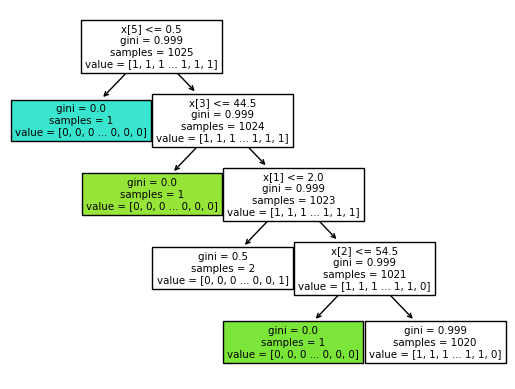

In [ ]:
_=plot_tree(tree,filled=True)
